In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Import my CSV data into jupyter
NYData = pd.read_csv('ADA-Assn1-CombinedData.csv')

In [2]:
#Q1 - 

#Q1i) - grouped data by bouroughs 

#Sort the data into respective borough
BoroughData = NYData.groupby('BOROUGH')

In [3]:
#Wanted to see all the stats for the boroughs combined 

NYData = pd.read_csv('ADA-Assn1-CombinedData.csv')
NYstats = NYData['SALE PRICE'].describe()
print(NYstats)

count    2.643350e+05
mean     1.460375e+06
std      9.855698e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.685400e+05
75%      1.033350e+06
max      1.033000e+09
Name: SALE PRICE, dtype: float64


In [4]:
#List a bunch of stats for each of the boroughs

BoroughStats = BoroughData['SALE PRICE'].describe()

In [5]:
#Print the stats for reach of the boroughs.
print(BoroughStats)

#After seeing the stats, 
#its clear there needs to be more preprocessing as housing are being sold for $0. This requires justifaction as 
#25$ percentile median is 0s across the a plethora of boroughs
#Will address this later in Q4

           count          mean           std  min       25%       50%  \
BOROUGH                                                                 
1        60811.0  3.061302e+06  1.797242e+07  0.0  424900.0  950000.0   
2        20595.0  8.345662e+05  3.679381e+06  0.0       0.0  335000.0   
3        76123.0  1.204338e+06  4.810175e+06  0.0       0.0  605000.0   
4        81547.0  9.485063e+05  6.769305e+06  0.0       0.0  395000.0   
5        25259.0  5.405466e+05  1.341385e+06  0.0       0.0  489000.0   

               75%           max  
BOROUGH                           
1        2175000.0  1.033000e+09  
2         725000.0  1.190000e+08  
3        1202871.0  3.177926e+08  
4         816625.0  3.177926e+08  
5         700000.0  5.870000e+07  


In [6]:
#Q1ii) Grouped data by type of housing and displayed the data

#Now i have to do something similar with the types of housing
#This seperates the dataset by BUILDING CLASS CATEGORY
typeOfHousing = NYData.groupby('BUILDING CLASS CATEGORY')

In [7]:
#Info cateorgized by the building class category

#This sees the data of the size prices of the different types of homes in NY
housingPrice =typeOfHousing['SALE PRICE'].describe()
print(housingPrice)
#After viewing data, must consider high value buildings that will affect the mean such as office buildings or the theatres. 
#must consider later in the project

                                              count          mean  \
BUILDING CLASS CATEGORY                                             
01 ONE FAMILY DWELLINGS                     56600.0  5.809358e+05   
02 TWO FAMILY DWELLINGS                     47577.0  5.997249e+05   
03 THREE FAMILY DWELLINGS                   13450.0  6.298817e+05   
04 TAX CLASS 1 CONDOS                        5099.0  7.201765e+05   
05 TAX CLASS 1 VACANT LAND                   3327.0  8.593946e+05   
06 TAX CLASS 1 - OTHER                        489.0  4.986249e+05   
07 RENTALS - WALKUP APARTMENTS               8763.0  2.094261e+06   
08 RENTALS - ELEVATOR APARTMENTS             1406.0  1.237129e+07   
09 COOPS - WALKUP APARTMENTS                 8630.0  6.522457e+05   
10 COOPS - ELEVATOR APARTMENTS              42903.0  9.119274e+05   
11 SPECIAL CONDO BILLING LOTS                 891.0  6.408828e+06   
12 CONDOS - WALKUP APARTMENTS                3087.0  8.668756e+05   
13 CONDOS - ELEVATOR APARTMENTS   

In [8]:
#This sees how the type of housing relates to how big the home is
housingSize =typeOfHousing['LAND SQUARE FEET'].describe()
print(housingSize)

                                              count          mean  \
BUILDING CLASS CATEGORY                                             
01 ONE FAMILY DWELLINGS                     56172.0  3.373380e+03   
02 TWO FAMILY DWELLINGS                     47576.0  2.913266e+03   
03 THREE FAMILY DWELLINGS                   13450.0  2.519980e+03   
04 TAX CLASS 1 CONDOS                           0.0           NaN   
05 TAX CLASS 1 VACANT LAND                   3327.0  5.313970e+03   
06 TAX CLASS 1 - OTHER                        489.0  2.548773e+03   
07 RENTALS - WALKUP APARTMENTS               8763.0  3.473731e+03   
08 RENTALS - ELEVATOR APARTMENTS             1405.0  1.823902e+04   
09 COOPS - WALKUP APARTMENTS                    0.0           NaN   
10 COOPS - ELEVATOR APARTMENTS                  0.0           NaN   
11 SPECIAL CONDO BILLING LOTS                 631.0  3.493679e+04   
12 CONDOS - WALKUP APARTMENTS                   0.0           NaN   
13 CONDOS - ELEVATOR APARTMENTS   

In [9]:
#This sees how the type of housing relates to when the house was built
housingAge =typeOfHousing['YEAR BUILT'].describe()
print(housingAge)

                                              count         mean        std  \
BUILDING CLASS CATEGORY                                                       
01 ONE FAMILY DWELLINGS                     56583.0  1944.240143  27.045495   
02 TWO FAMILY DWELLINGS                     47552.0  1940.139700  31.736738   
03 THREE FAMILY DWELLINGS                   13442.0  1940.835069  36.268191   
04 TAX CLASS 1 CONDOS                        3954.0  1986.394031  27.210761   
05 TAX CLASS 1 VACANT LAND                    325.0  2013.609231  26.172114   
06 TAX CLASS 1 - OTHER                        369.0  1949.745257  21.208210   
07 RENTALS - WALKUP APARTMENTS               8760.0  1927.239726  25.132580   
08 RENTALS - ELEVATOR APARTMENTS             1399.0  1968.375268  42.482901   
09 COOPS - WALKUP APARTMENTS                 8630.0  1931.727231  22.352365   
10 COOPS - ELEVATOR APARTMENTS              42903.0  1947.409948  18.858952   
11 SPECIAL CONDO BILLING LOTS                 875.0 

In [10]:
#Q1iii) I then displayed the datas missing points. Usinng the newfound info, i infered the meaning of the missing data 


#Next is to check the missing data of this data set, i noticed earlier for the housing price so i will look further into the data
NYData.info()
#After seeing the missing stats in the data, it is apararent the price sold is filled out but it is listed as 0 and not null. 
#Will further look into to find solution as having large quanity of 0s for housing price is problematic

#After analysising this data set, it seems Tax class, apartment num and zip code has missing numbers
#Another plausable reason is some of these tags are not applicable to all categories such as apartment number is only used for apartments

#Ease-ment also is empty. not sure the purpose of this field so will remove later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264335 entries, 0 to 264334
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         264335 non-null  int64  
 1   NEIGHBORHOOD                    264335 non-null  object 
 2   BUILDING CLASS CATEGORY         264335 non-null  object 
 3   TAX CLASS AT PRESENT            263988 non-null  object 
 4   BLOCK                           264335 non-null  int64  
 5   LOT                             264335 non-null  int64  
 6   EASE-MENT                       0 non-null       float64
 7   BUILDING CLASS AT PRESENT       263988 non-null  object 
 8   ADDRESS                         264335 non-null  object 
 9   APARTMENT NUMBER                65457 non-null   object 
 10  ZIP CODE                        264318 non-null  float64
 11  RESIDENTIAL UNITS               200154 non-null  float64
 12  COMMERCIAL UNITS

In [11]:
#Q2 - The boroughs selected are 1 and 3. (Manhattan and Brooklyn)

#Question2i - Are there significant differences in the recovery of house prices post-COVID-19 among the
#different types of housing (BUILDING CLASS CATEGORY) in Manhattan (Borough 1) and Brooklyn (Borough 3)?

#Question2ii Does the size of the house significantly impact the recovery of house prices post-COVID-19 in Manhattan (Borough 1) and Brooklyn? (Borough 3)



In [12]:
#Question2i - Are there significant differences in the recovery of house prices post-COVID-19 among the
#different types of housing (BUILDING CLASS CATEGORY) in Manhattan (Borough 1) and Brooklyn (Borough 3)?

#My assumption is housing class categories does impact the recovery of house prices and more expensive options will recover quicker than cheaper ones as the demographic 
#Cheaper houses are typiccaly purchased by people that have less income and are more influenced by the market doing poorly and covid.

#The motivation behind the above mentioned question is to better understand
#how COVID has impacted the different types of properties in borough 1 and 3. 

#An Analysis of Variance test can be used to compare the average recovery pricess across the different building class categories within Manhattan and Brooklyn. 
#This can help understand and identify the differnences in recovery rates for the different building class categories

#Analysis of Variance is being used as we are comparing 3+ more groups in the building class category 
#Friedman can also be investigated into as well depending on how the data results and if its parametric or not

In [13]:
#Question2ii Does the size of the house significantly impact the recovery of house prices post-COVID-19 in Manhattan (Borough 1) and Brooklyn? (Borough 3)

#The motivation behind this question investigates whether larger homes have experienced a different recovery compared to smaller ones post-pandemic. 
#If there is a change, it could be a reflection of changing preferences or needs as a result of remote work and social distancing or other factors

#Similar to my answer to Q2i, i think the smaller land will be impacted more and recover slower than the larger land as people with less money are impacted more by covid creating a larger ripple in thier intended market

#For my test, i will be using the two-sample T test as this compares the mean of two independent groups. This was choosen as the sample being used is quite large and spans over multiple years
#The square footage of homes should also be distrbuted normaly 

In [14]:
#Question 3 -

#First i would select the 3 types of houses i would like to compare the house prices and house sales for. 

#Then i would use scatter plot as it is easy to understand and visualize the relationship between the variables
#Easy to see and understand if there is an underlying pattern

#I might also consider a bar graph just to consider the average house or total sales of the respective house types too just for a better understanding of the info



In [15]:
#Q3 code -

#The building code i have choosen to use for Q3 are 1, 2 and 3 family dwellings

#I do all the data selection during the question itself :)


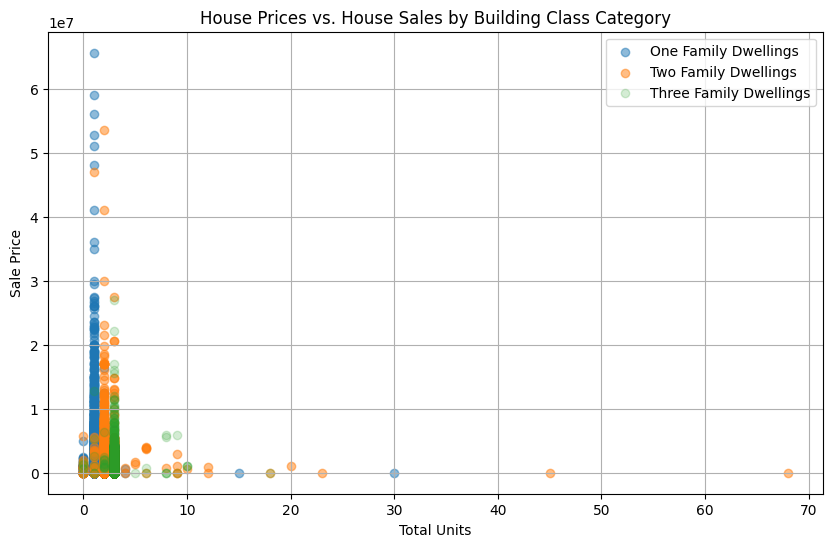

In [16]:
#Scatter plot for Q3

#Create the plot and makes the size 10, 6
plt.figure(figsize=(10, 6))

#-----------------------------------------------------------------------
#Scatter plot for the one family dwellings

#Uses scatter from matlab to create a scatterplot
#Then i search building class category for one family dwelling and selects the total units and then it does the same for sale price

#I create a label so when i display the info, i can understand which data is which category
#The alpha is so the dots are a bit more transparent so i can see other points since they are crowded on each other 


plt.scatter(NYData[NYData['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']['TOTAL UNITS'],
            NYData[NYData['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']['SALE PRICE'],
            label='One Family Dwellings', alpha=0.5)

#--------------------------------------------------------------------------------------------
#Scatter plot for the two family dwellings

#I do similar things as for the first plot but do it for two and then three family dwelling
plt.scatter(NYData[NYData['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS']['TOTAL UNITS'],
            NYData[NYData['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS']['SALE PRICE'],
            label='Two Family Dwellings', alpha=0.5)

#-------------------------------------------------------------------------------------------------------
#Scatter plot for the three family dwellings
plt.scatter(NYData[NYData['BUILDING CLASS CATEGORY'] == '03 THREE FAMILY DWELLINGS']['TOTAL UNITS'],
            NYData[NYData['BUILDING CLASS CATEGORY'] == '03 THREE FAMILY DWELLINGS']['SALE PRICE'],
            label='Three Family Dwellings', alpha=0.2)
#----------------------------------------------------------------------------------------------------------
plt.xlabel('Total Units')
plt.ylabel('Sale Price')
plt.title('House Prices vs. House Sales by Building Class Category')
plt.legend()
plt.grid(True)
plt.show()

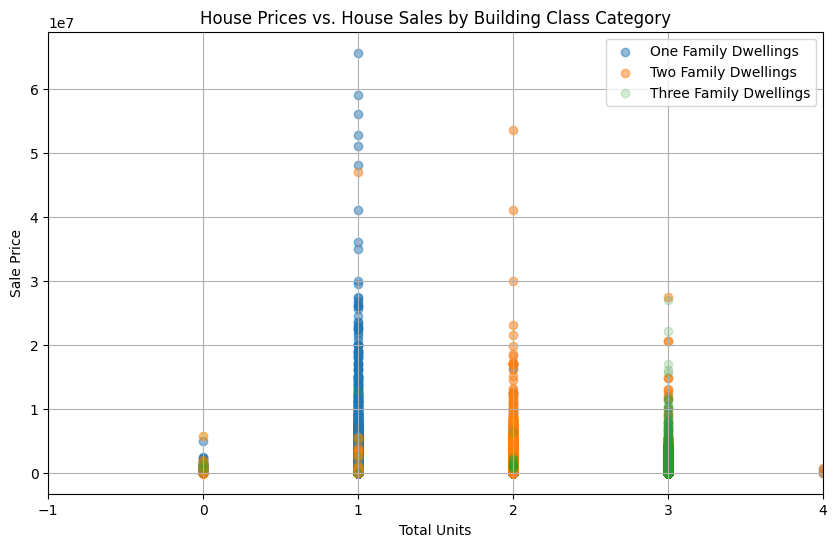

In [17]:
#Created a second chat that was more zoomed in as the first one was difficult to gather info from. This does miss some data points but the data points can be seen in the chart above


# Create the plot and make the size 10, 6
plt.figure(figsize=(10, 6))

# Scatter plot for the one family dwellings
plt.scatter(NYData[NYData['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']['TOTAL UNITS'],
            NYData[NYData['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']['SALE PRICE'],
            label='One Family Dwellings', alpha=0.5)

# Scatter plot for the two family dwellings
plt.scatter(NYData[NYData['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS']['TOTAL UNITS'],
            NYData[NYData['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS']['SALE PRICE'],
            label='Two Family Dwellings', alpha=0.5)

# Scatter plot for the three family dwellings
plt.scatter(NYData[NYData['BUILDING CLASS CATEGORY'] == '03 THREE FAMILY DWELLINGS']['TOTAL UNITS'],
            NYData[NYData['BUILDING CLASS CATEGORY'] == '03 THREE FAMILY DWELLINGS']['SALE PRICE'],
            label='Three Family Dwellings', alpha=0.2)

# Set the X-axis limits 
plt.xlim(-1, 4)

plt.xlabel('Total Units')
plt.ylabel('Sale Price')
plt.title('House Prices vs. House Sales by Building Class Category')
plt.legend()
plt.grid(True)
plt.show()

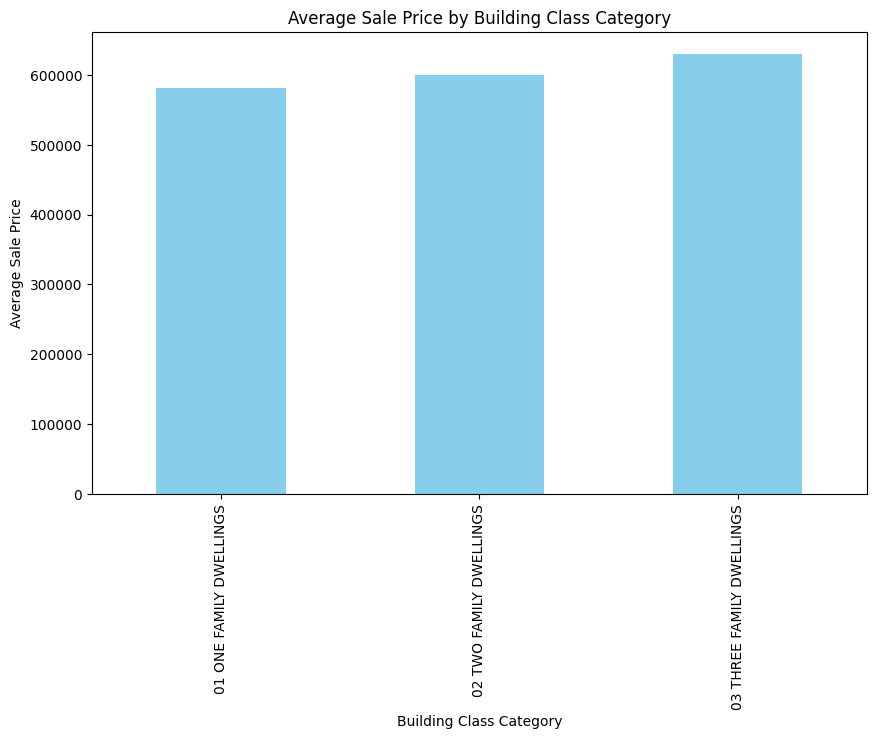

In [18]:
#Bar graph display

#Selects the categories i will be using to display. Ensures the selected housing type is displayed in the bar graph
BarGraph = NYData[NYData['BUILDING CLASS CATEGORY'].isin(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '03 THREE FAMILY DWELLINGS'])]

# Calculate the average sale price for each building type 
BarData = BarGraph.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].mean()

# Create a bar graph to visualize the average sale prices
plt.figure(figsize=(10, 6))
BarData.plot(kind='bar', color='skyblue')
plt.xlabel('Building Class Category')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Building Class Category')
plt.show()

In [19]:
#Q3 Findings

#Scatter plot analysis

#The data points for single dwellings in more spread out while the 2 and 3 dwellings are more condensed on the graph 
#There are a few data points that stand out significantly from the rest, especially in the 1 family dwelling category 
#where some sale prices are exceptionally high.
#This could be high end living or luxury and this can explain the price difference

#There is more of a concentration of sales on the lower end then the higher end 
#and this can indicate there is more affordable housing than luxury housing for the 3 housing options (by comparison)



#Bar Graph

#In the second graph, it shows 3 family dwelling average sale price costing the most and then 1 family dwelling price costing the least.
#and this is also understandable as there are more units in total 
#and this would mean more income / value for the new homeowner since they can rent to 3 familes instead of 1.
#It can also mean there is more amenities or other factors which also increase the price of 3 family dwellings on average.

In [20]:
#Question 4 -

#Before i begin Q4, i think its time to address the 0 doller sales in this data

# Count the number of $0 sales
zero_sales_count = NYData[NYData['SALE PRICE'] == 0].shape[0]

# Calculate the total number of transactions
total_transactions = NYData.shape[0]

# Calculate the percent of $0 sales
zero_sales_percent = (zero_sales_count / total_transactions) * 100

print(f"Number of $0 Sales: {zero_sales_count}")
print(f"Total Transactions: {total_transactions}")
print(f"Percent of $0 Sales: {zero_sales_percent:.2f}%")


Number of $0 Sales: 75553
Total Transactions: 264335
Percent of $0 Sales: 28.58%


In [21]:
#Calculate the $0 sales, total transactions and percent $0 sales for each borough

for borough in range(1, 6):
    borough_data = NYData[NYData['BOROUGH'] == borough]
    zero_sales_count = borough_data[borough_data['SALE PRICE'] == 0].shape[0]
    total_transactions = borough_data.shape[0]
    zero_sales_percent = (zero_sales_count / total_transactions) * 100
    print(f"Borough {borough} - $0 Sales: {zero_sales_count}, Total Transactions: {total_transactions}, Percent of $0 Sales: {zero_sales_percent:.2f}%")

Borough 1 - $0 Sales: 10185, Total Transactions: 60811, Percent of $0 Sales: 16.75%
Borough 2 - $0 Sales: 6247, Total Transactions: 20595, Percent of $0 Sales: 30.33%
Borough 3 - $0 Sales: 24824, Total Transactions: 76123, Percent of $0 Sales: 32.61%
Borough 4 - $0 Sales: 26621, Total Transactions: 81547, Percent of $0 Sales: 32.64%
Borough 5 - $0 Sales: 7676, Total Transactions: 25259, Percent of $0 Sales: 30.39%


In [22]:
#Question 4 - Cont

#Upon further investigation, these 0s spans across all the boroughs and housing types

#There is also silly other numbers like 1 and 10, i am considering implementing a threshold to exclude all data below the minimum 
#as this will interfer with the data if 40% of the data is housing being sold under $100 (I wish i could find a house for that price)

#If you scroll up to an earlier analysis, it can be seen alot of the boroughs have $0 for 25 percentile
#They also have a large range and this may lead me to only create a model for one of the boroughs as creating 1 model for the 5 boroughs 
#will produce poor results as the program will have to take in which price is what without truly understanding how the boroughs effect it
#Where if i stick to one borough, i can get better results

#As a result, I have decided to narrow my focus onto only Borough 1 to determine the sale price

#3 Reasons for choosing Borough 1
#Reason 1 -
#The dataset contains alot of zero values and outliers in saleprice, this spans across all boroughs but it is the worst borughs 2-5, so i picked borough 1 for this reason

#Reason 2 -
#There is a large variability across all the boroughs, this makes create a predictor difficult esspcially for all boroughs combined
#Therefore, im sticking to borough 1 as it has the least amount of extremes or questionable data ($0 sale price)

#Reason 3 -
#For personal reasons, i think creating models for luxury homes is more excitng than average homes


#Knowing all that, i still most handle the low housing issue in this dataset but i will do in the following questions

In [23]:

#Question 5 -

#Target Goal - Predicting Sale price 
#In this section, the feature i wish to predict is the sale price of borough 1 buildings. 
#I will then brainstorm features I could see as useful for achieving this

#Brainstorming feature selection -

#Firstly, in order to address the $0 sale price, I have decided to exclude all sales below a threshold. I will conduct further 
#analysis to determine a proper threshold and justify it.

#To begin, i have decided to set a threshold of 50 000 and then continue to test sensitivity and its results on the predictions. 
#To be continued when prediction occurs

#Next to feature selection

#Neighborhoods is important - very telling in the price of something - Is categorical, must come up with solution

#Building Class Category - is also very telling of the price of a building - Also categorical

#Tax Class at Present - Also useful as it tells how the property is intended on being used. - Also categorical

#Residential Units- Tells the size of the propety
#Commerical Units - Same as above
#Land Square Feet - Also the same but might be a concern for Multicollinearity
#Gross square feet - concern for Multicollinearity
#Year built - Could be a good indiction of price as older builds could require more work and be sold cheaper as a result
#Tax Class at sale - concern for Multicollinearity

#I dont think other columns are useful as Ease Ment is blank, apartment number is irrelvent and sale date could be telling 
#but i am concered with overfitting
# I am also concerned with how the seasons effect the market and could make this model too complex 







In [24]:
borough_1_data = NYData[NYData['BOROUGH'] == 1].copy()

# Convert columns to a categorical type if they are not already
borough_1_data.loc[:, 'NEIGHBORHOOD'] = borough_1_data['NEIGHBORHOOD'].astype('category')
borough_1_data.loc[:, 'BUILDING CLASS CATEGORY'] = borough_1_data['BUILDING CLASS CATEGORY'].astype('category')
borough_1_data.loc[:, 'TAX CLASS AT PRESENT'] = borough_1_data['TAX CLASS AT PRESENT'].astype('category')

# Perform one-hot encoding
encoded_columns = pd.get_dummies(borough_1_data[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT']])

# Convert boolean True/False to 1/0 if necessary
encoded_columns = encoded_columns.astype(int)

# Join the new columns with the original 
borough_1_data = borough_1_data.join(encoded_columns)

# Save the modified DataFrame
borough_1_data.to_csv('encoded_borough_1_data.csv', index=False)

In [25]:
#Detecting Multicollinearity -
#I will use VIF to improve stability of the model and remove multicollinearity


In [26]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.read_csv('encoded_borough_1_data.csv')


non_numeric = [col for col in df.columns if df[col].dtype == 'object']
print("Non-numeric columns:", non_numeric)

# Check for columns with NaN, None, or inf values
columns_with_invalid_values = [col for col in df.columns if not np.isfinite(df[col].all())]
print("Columns with NaN, None, or inf values:", columns_with_invalid_values)


Non-numeric columns: ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE']
Columns with NaN, None, or inf values: []


In [27]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

# Load your dataset
df = pd.read_csv('encoded_borough_1_data.csv')


# Drop initial set of columns
columns_to_drop = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                   'BUILDING CLASS AT TIME OF SALE', 'ADDRESS', 'APARTMENT NUMBER', 'SALE DATE']
df = df.drop(columns=columns_to_drop)

# Fill NaNs and replace Inf values
df = df.fillna(0).replace([np.inf, -np.inf], 0)

# Select only numeric data
df = df.select_dtypes(include=[np.number])

# Define the VIF calculation function
def calculate_vif_(X, thresh=5.0):
    variables = list(X.columns)
    high_vif = True
    while high_vif:
        high_vif = False
        vif = [variance_inflation_factor(X[variables].values, i) for i in range(len(variables))]
        max_vif = max(vif)
        if max_vif > thresh:
            max_index = vif.index(max_vif)
            print(f"Dropping '{variables[max_index]}' with VIF: {max_vif}")
            del variables[max_index]
            high_vif = True
    return pd.DataFrame({'Variable': variables, 'VIF': [variance_inflation_factor(X[variables].values, i) for i in range(len(variables))]})

# Add constant and calculate initial VIF
X = add_constant(df)
print("Initial VIF Factors:")
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    print(calculate_vif_(X))

# Drop additional highly correlated columns
columns_to_drop = ['RESIDENTIAL UNITS', 'TAX CLASS AT PRESENT_4', 'TAX CLASS AT PRESENT_1C', 
                   'LAND SQUARE FEET', 'BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS', 
                   'BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL', 'TAX CLASS AT PRESENT_1']
df = df.drop(columns=columns_to_drop)

# Re-calculate VIF after dropping columns
X = add_constant(df)
print("\nUpdated VIF Factors:")
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    print(calculate_vif_(X))

Initial VIF Factors:
Dropping 'RESIDENTIAL UNITS' with VIF: inf
Dropping 'NEIGHBORHOOD_CHELSEA' with VIF: inf
Dropping 'TAX CLASS AT TIME OF SALE' with VIF: inf
Dropping 'BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS' with VIF: inf
Dropping 'BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS' with VIF: inf
Dropping 'BOROUGH' with VIF: 158852.0298150546
Dropping 'ZIP CODE' with VIF: 18364.83024595327
Dropping 'BLOCK' with VIF: 761.5622147682342
Dropping 'TAX CLASS AT PRESENT_2' with VIF: 654.749274118534
Dropping 'TAX CLASS AT PRESENT_4' with VIF: 58.02979990451802
Dropping 'BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS' with VIF: 14.17698912489813
Dropping 'YEAR BUILT' with VIF: 8.649187250079649
Dropping 'GROSS SQUARE FEET' with VIF: 5.172345571460975
                   Variable       VIF
0                       LOT  3.372932
1                 EASE-MENT       NaN
2          COMMERCIAL UNITS  1.632597
3               TOTAL UNITS  2.657838
4          LAND SQUARE FEET  1.523498
..

KeyboardInterrupt: 

In [30]:
#Question 6 -


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv('encoded_borough_1_data.csv')
df = df[df['SALE PRICE'] >= 100000]

# List of columns to drop based on VIF analysis
columns_to_drop_vif = [
    'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'NEIGHBORHOOD_CHELSEA', 'TAX CLASS AT TIME OF SALE',
    'BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS', 'BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS',
    'BOROUGH', 'ZIP CODE', 'BLOCK', 'TAX CLASS AT PRESENT_2', 'TAX CLASS AT PRESENT_4',
    'BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS', 'GROSS SQUARE FEET', 'TOTAL UNITS', 'LAND SQUARE FEET', 'YEAR BUILT'
]

# Additional initial set of columns to drop
columns_to_drop_initial = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT PRESENT',
                           'BUILDING CLASS AT TIME OF SALE', 'ADDRESS', 'APARTMENT NUMBER', 'SALE DATE', 'EASE-MENT']

# Combine both lists of columns to drop
all_columns_to_drop = columns_to_drop_vif + columns_to_drop_initial

# Drop the columns from the DataFrame
df = df.drop(columns=all_columns_to_drop, errors='ignore')  # errors='ignore' to avoid issues if any column is missing

# Define features (X) and target (y)
X = df.drop('SALE PRICE', axis=1)  # Drop the target variable from features
y = df['SALE PRICE']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Initialize the Random Forest model
RFmodel = RandomForestRegressor(random_state=42)

# Fit the Random Forest model on the training data
RFmodel.fit(X_train, y_train)

# Predict on the testing data using the Random Forest model
y_pred_rf = RFmodel.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Linear Regression Results:
Mean Squared Error: 365626784836271.1
R-squared: 0.3659490891281878

Random Forest Results:
Mean Squared Error: 276138827470843.56
R-squared: 0.521134439963509


In [33]:
#Question 6 - cont

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Load dataset
df = pd.read_csv('ADA-Assn1-CombinedData.csv')

# Drop the columns from the DataFrame
df = df.drop(columns=all_columns_to_drop, errors='ignore')  

# Define features (X) and target (y)
X = df.drop('SALE PRICE', axis=1)  # Drop the target variable from features
y = df['SALE PRICE']  # Target variable

non_numeric = df.select_dtypes(include=['object']).columns.tolist()
print(non_numeric)  # This will print all non-numeric columns

print(X_train.isnull().sum())

# Split the data into training and testing sets
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Random Forest Results:")
# Initialize the Random Forest model
RFmodel = RandomForestRegressor(random_state=42)

# Fit the model on the training data
RFmodel.fit(X_train, y_train)

# Predict on the testing data
y_pred = RFmodel.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

[]
LOT    0
dtype: int64
Linear Regression Results:
Mean Squared Error: 133358327409994.33
R-squared: 0.0017381200711318323
Random Forest Results:
Mean Squared Error: 134533179570219.78
R-squared: -0.00705630731021567


In [32]:
#Question 6 - Write up 

#Model A -
#In Model A, feature selection was used based on VIF and general understanding of the topic. Certain features were dropped as a result
#Also, features with large amounts of missing data or non relevent info were also removed

#In addition, the model removed sales lower than 100 000 to avoid extreme outliers. also non numeric columns were also removed

#As a result, the performence with 
#Linear regression - Mean Squared Error of 365,626,784,836,271.1 and an R-squared of 0.3659.
#Random Forest - Provided a lower MSE of 276,138,827,470,843.56 and a higher R-squared of 0.5211, indicating a better fit.

#Model B - 

#All orginal features were retained and the raw data was used 

#Performence 

#Linear Regression - MSE of 133,358,327,409,994.33 but a very low R-squared of 0.0017
#Random Forest - MSE of 134,533,179,570,219.78 but a negative R-squared of -0.0071, suggesting a poor fit compared to the average of the data.

#Comparison of models

#Model A constantly outperformed model B in R-Squared in both linear regression and random forest. this shows the importance of feature selection
#And preproccesing in building strong models. Even though Model B has a lower MSE, its extremely low R-squared value shows it fails to capture any trends

